In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Old function

The following definition is the old function used during the Hands-On, not currently integrated in the PyCalib library. It is here in order to compare the old and new versions and see if the new version is better. It is intended to be removed from here once the new version is final.

In [2]:
def plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels, title=None,
                                         fig=None, ax=None, legend=True):
    '''Plot binary reliability diagram gaps

    Parameters
    ==========
    bin_probs : list
        List of lists representing the probabilities in each bin
    bin_labels : list
        List of lists representing the actual labels in each bin
    n_bins : integer
        Number of bins to divide the scores
    title : string
        Title for the plot
    fig : matplotlib.pyplot.figure
        Plots the axis in the given figure
    ax : matplotlib.pyplot.Axis
        Axis where to draw the plot
    legend : boolean
        If True the function will draw a legend

    Regurns
    =======
    fig : matplotlib.pyplot.figure
        Figure with the reliability diagram
    '''
    if fig is None and ax is None:
        fig = plt.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    if title is not None:
        ax.set_title(title)
    
    n_bins = len(bin_probs)
    
    bin_size = np.zeros(n_bins)
    centers = np.zeros(n_bins)
    lefts = np.zeros(n_bins)
    start = 0
    
    for i in range(n_bins):
        centers[i] = np.mean(bin_probs[i])
        lefts[i] = start
        if i == (n_bins - 1):
            bin_size[i] = 1 - start
        else:
            end = (centers[i] + np.mean(bin_probs[i + 1])) / 2
            bin_size[i] = end - start
            start = end
            
    true_proportion = np.array([np.mean(l) for l in bin_labels])
    pred_mean = np.array([np.mean(probs) for probs in bin_probs])

    not_nan = np.isfinite(true_proportion - centers)
    ax.bar(lefts, true_proportion, width=bin_size, edgecolor="black",
           color="blue", label='True class prop.', align='edge')
    ax.bar(pred_mean[not_nan], (true_proportion - pred_mean)[not_nan],
           bottom=pred_mean[not_nan], width=bin_size/4.0, edgecolor="red",
           color="#ffc8c6",
           label='Gap pred. mean')
    ax.scatter(pred_mean[not_nan], true_proportion[not_nan], color='red',
               marker="+", zorder=10)

    if legend:
        ax.legend()

    ax.plot([0, 1], [0, 1], linestyle="--")
    ax.set_xlim([0, 1])
    ax.set_xlabel('Predicted probability')
    ax.set_ylim([0, 1])
    ax.set_ylabel('Proportion of positives')
    ax.grid(True)
    ax.set_axisbelow(True)
    fig.tight_layout()
    print(bin_size)
    return fig, ax

# Reliability diagrams with user-provided bins

The following is the old way of defining the probabilities and labels. These were defined by a list of lists, each inner list contained the scores given by the model in **bin_probs** and the true labels in **bin_labels**.

[0.25 0.3  0.25 0.2 ]


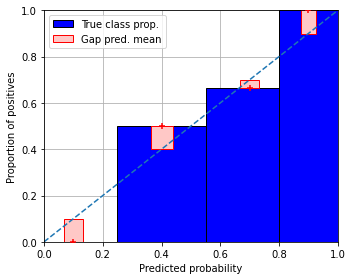

In [3]:
bin_probs = [
    [0.1, 0.1],
    [0.4, 0.4],
    [0.7, 0.7, 0.7],
    [0.9]
]



bin_labels = [
    [0, 0],
    [0, 1],
    [0, 1, 1],
    [1]
]

fig = plt.figure(figsize=(5, 4))
plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels, fig=fig)
plt.savefig('Forecaster1-fixed-gaps-v1.pdf')

# New version from PyCalib

The new version does not need a list of lists to specify the bins. Instead, an arbitrary list of scores and labels and a list of bin boundaries can be passed. We will use the previously defined lists of lists and concatenate them with numpy instead of defining again here.

**However**, the scores need to be of shape (n_samples, n_classes), for that reason we stack the original scores with their complementary in a (2, n_samples) and then transpose.

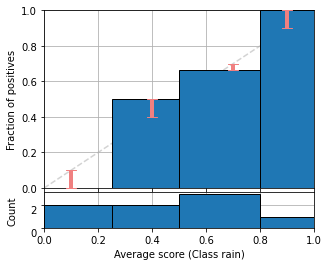

In [4]:
from pycalib.visualisations import plot_reliability_diagram

labels = np.concatenate(bin_labels)
scores = np.concatenate(bin_probs)
bins = [0, 0.25, 0.5, 0.8, 1.0]
fig = plt.figure(figsize=(5, 4))
fig = plot_reliability_diagram(labels, np.vstack([1 - scores, scores]).T,
                               class_names=['not 1', 'rain'], bins=bins,
                               fig=fig, show_gaps=True,
                               show_bars=True)
fig.savefig('Forecaster1-fixed-gaps-v2.pdf')

We see several other options in the following cells.

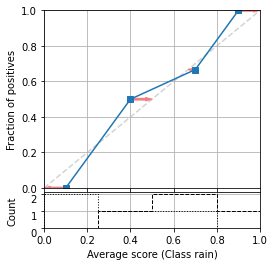

In [5]:
fig = plot_reliability_diagram(labels, np.vstack([1 - scores, scores]).T,
                               class_names=['not 1', 'rain'], bins=bins,
                               show_correction=True,
                               hist_per_class=True)

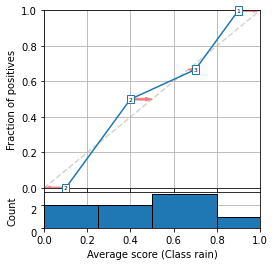

In [6]:
fig = plot_reliability_diagram(labels, np.vstack([1 - scores, scores]).T,
                               class_names=['not 1', 'rain'], bins=bins,
                               show_correction=True,
                               hist_per_class=False,
                               show_counts=True)

[0.25  0.275 0.275 0.2  ]


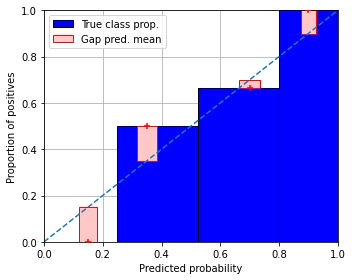

In [7]:
bin_probs = [
    [0.1, 0.2],
    [0.3, 0.4],
    [0.6, 0.7, 0.8],
    [0.9]
]



bin_labels = [
    [0, 0],
    [0, 1],
    [0, 1, 1],
    [1]
]

fig = plt.figure(figsize=(5, 4))

plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels, fig=fig)
plt.savefig('Forecaster2-fixed-gaps-v1.pdf')

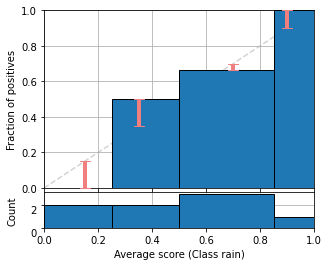

In [8]:
labels = np.concatenate(bin_labels)
scores = np.concatenate(bin_probs)
bins = [0, 0.25, 0.5, 0.85, 1.0]
fig = plt.figure(figsize=(5, 4))
fig = plot_reliability_diagram(labels, np.vstack([1 - scores, scores]).T,
                               class_names=['not 1', 'rain'], bins=bins,
                               fig=fig,
                               hist_per_class=False,
                               show_bars=True,
                               show_gaps=True)
fig.savefig('Forecaster2-fixed-gaps-v2.pdf')

[0.5 0.5]


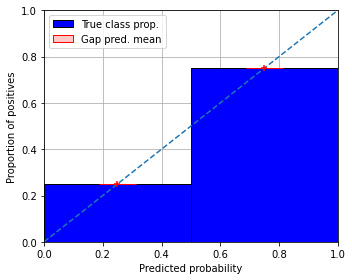

In [9]:
bin_probs = [
    [.1, .2, .3, .4],
    [.6, .7, .8, .9],
]


bin_labels = [
    [0, 0, 0, 1],
    [0, 1, 1, 1],
]

fig = plt.figure(figsize=(5, 4))
plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels, fig=fig)
plt.savefig('Forecaster3-fixed-gaps-v1.pdf')

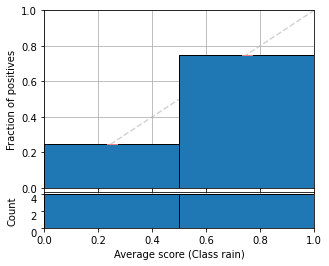

In [10]:
labels = np.concatenate(bin_labels)
scores = np.concatenate(bin_probs)
bins = [0, 0.5, 1]
fig = plt.figure(figsize=(5, 4))
fig = plot_reliability_diagram(labels, np.vstack([1 - scores, scores]).T,
                               class_names=['not 1', 'rain'], bins=bins,
                               fig=fig,
                               hist_per_class=False,
                               show_bars=True,
                               show_gaps=True)
fig.align_labels()
fig.savefig('Forecaster3-fixed-gaps-v2.pdf')

[0.15 0.1  0.1  0.15 0.15 0.1  0.1  0.15]


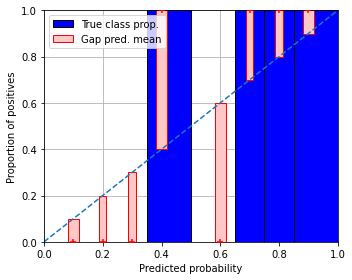

In [11]:
bin_probs = [
    [.1],
    [.2],
    [.3],
    [.4],
    [.6],
    [.7],
    [.8],
    [.9],
]


bin_labels = [
    [0],
    [0],
    [0], 
    [1],
    [0], 
    [1], 
    [1],
    [1],
]

fig = plt.figure(figsize=(5, 4))
plot_reliability_diagram_gaps_from_bins(bin_probs, bin_labels, fig=fig)
plt.savefig('Forecaster4-fixed-gaps-v1.pdf')

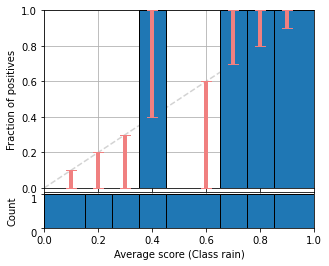

In [12]:
labels = np.concatenate(bin_labels)
scores = np.concatenate(bin_probs)
bins = [0, .15, .25, .35, .45, .65, .75, .85, 1]
fig = plt.figure(figsize=(5, 4))
fig = plot_reliability_diagram(labels, np.vstack([1 - scores, scores]).T,
                               class_names=['not 1', 'rain'], bins=bins,
                               fig=fig,
                               hist_per_class=False,
                               show_bars=True,
                               show_gaps=True)
fig.savefig('Forecaster4-fixed-gaps-v2.pdf')